# Dataquest Neural Network Project

The goal of this project is to create a feedforward neural network that properly classfies handwritten digits.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

Download dataset of handwritten digits from UC Irvine Machine Learning Repository

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
target=pd.Series(digits['target'])
features=pd.DataFrame(digits['data'])
features.shape

(1797, 64)

Let's look at some sample images.

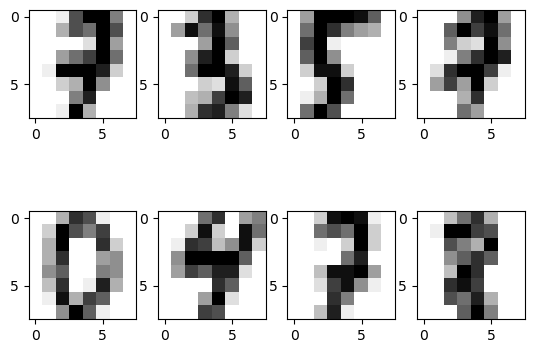

In [5]:
f, axarr = plt.subplots(2, 4)
for i in [0,1]:
    for j in [0,1,2,3]:
        axarr[i,j].imshow(features.iloc[np.random.randint(0, features.shape[0])].values.reshape(8,8), cmap='gray_r')

## K-nearest neighbors

We'll start by using a K-nearest neighbors model to classify the images.

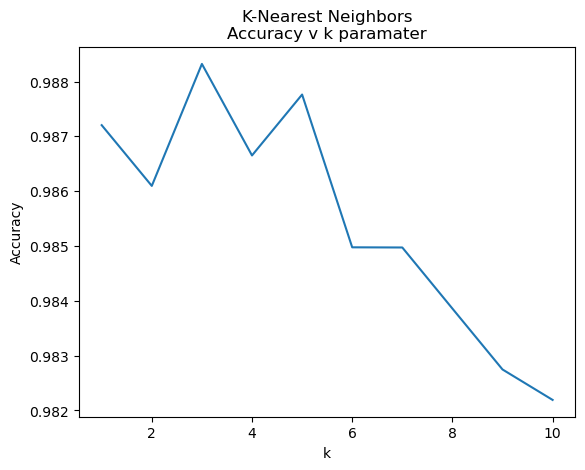

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def KNN_model(k):
    kf = KFold(10, shuffle=True, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, features, target, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

accuracy_scores=[]
for n in range(1,11):
    accuracy_scores.append(KNN_model(k=n))

plt.plot(range(1,11), accuracy_scores)
plt.title('K-Nearest Neighbors\nAccuracy v k paramater')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

It looks like accuracy hovers around 98.7%, perhaps (other iterations of this model show slightly varying results) dropping off as k approaches 10. We'll take 98.7% as a benchmark as we pivot towards using a neural network to solve this problem.

## Neural network

We begin with a one-layer neural network with varied amounts of neurons in the hidden layer.

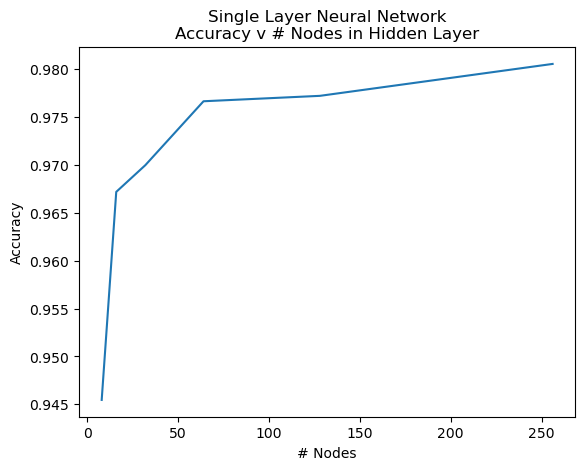

In [12]:
def NN_model_1layer(nodes=n):
    kf = KFold(10, shuffle=True)
    nn = MLPClassifier(hidden_layer_sizes=(nodes,), max_iter=1000)
    accuracy = cross_val_score(nn, features, target, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

accuracy_scores=[]
node_sizes=[2**n for n in range(3,9)]
for n in node_sizes:
    accuracy_scores.append(NN_model_1layer(nodes=n))

plt.plot(node_sizes,accuracy_scores)
plt.title('Single Layer Neural Network\nAccuracy v # Nodes in Hidden Layer')
plt.xlabel('# Nodes')
plt.ylabel('Accuracy')
plt.show()

It appears there are diminishing marginal returns to increasing the number of nodes in the layer beyond 64 and that 98% accuracy is the best we can hope for with a 1 layer neural network. Let's now increase the number of layers to two and three and see how that effects our results. 

In [13]:
accuracy_scores={'1L': accuracy_scores,
                '2L': [],
                '3L': []}

def NN_model(layer_sizes):
    kf = KFold(10, shuffle=True)
    nn = MLPClassifier(hidden_layer_sizes=layer_sizes, max_iter=1000)
    accuracy = cross_val_score(nn, features, target, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

for n in node_sizes:
    accuracy_scores['2L'].append(NN_model(layer_sizes=(n,n)))
    accuracy_scores['3L'].append(NN_model(layer_sizes=(n,n,n)))

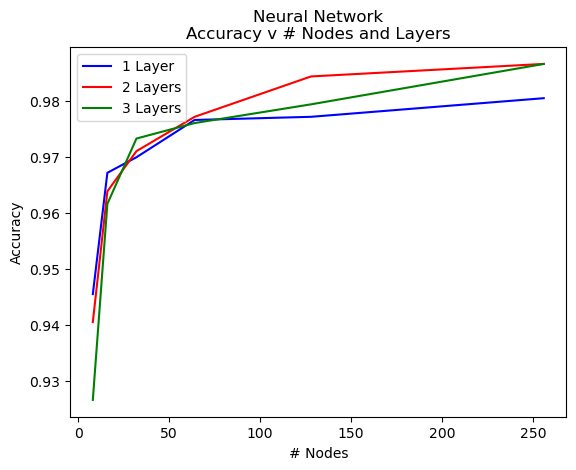

In [14]:
plt.plot(node_sizes, accuracy_scores['1L'], color='b', label='1 Layer')
plt.plot(node_sizes, accuracy_scores['2L'], color='r', label='2 Layers')
plt.plot(node_sizes, accuracy_scores['3L'], color='g', label='3 Layers')

plt.title('Neural Network\nAccuracy v # Nodes and Layers')
plt.xlabel('# Nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
accuracy_scores['2L']

[0.9404624456859093,
 0.9638485412787089,
 0.9710459342023589,
 0.9771880819366853,
 0.9844103041589076,
 0.9866511483550591]

From the above chart, we conclude that accuracy peaks at 98.7% when our neural network has 2 or 3 hidden layers with 256 nodes each. This is a slight improvmeent above the accuracy we obtained using K-nearest neighbors. 